In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
df['Embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


In [6]:
df.drop(columns = 'Cabin', inplace = True)

In [7]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


In [8]:
df["Age"].fillna(df["Age"].mean(), inplace = True)

In [9]:
df["Fare"].fillna(df["Fare"].mean(), inplace = True)

In [10]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188


In [11]:
df.drop(columns = ["Name", "PassengerId"], inplace = True)

In [12]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


In [13]:
df.drop(columns = ["Ticket"], inplace = True)

In [14]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sex', ylabel='count'>

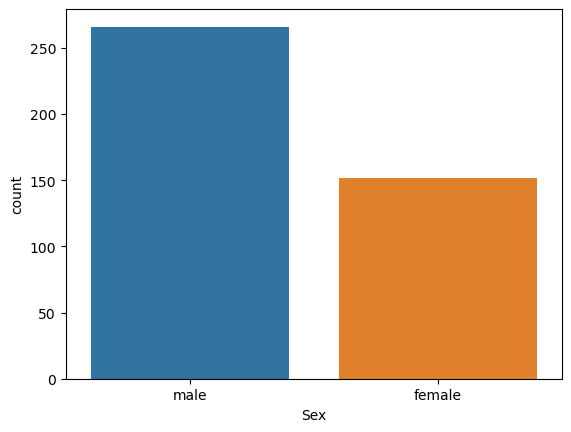

In [15]:
sns.countplot(x = df["Sex"])

C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Embarked', ylabel='count'>

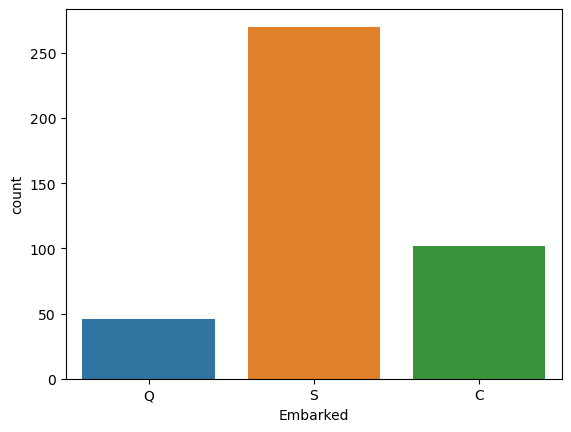

In [16]:
sns.countplot(x = df["Embarked"])

C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Survived', ylabel='count'>

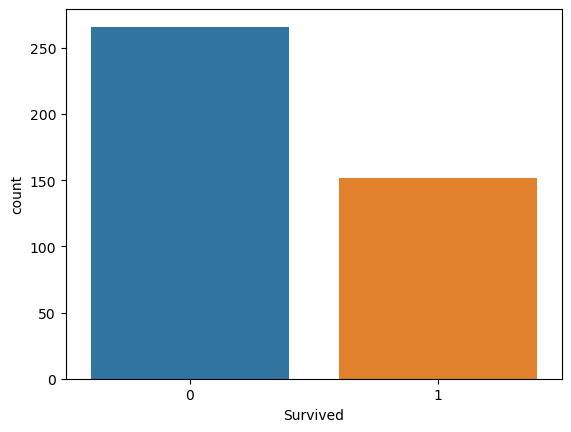

In [17]:
sns.countplot(x = df["Survived"])

In [18]:
le = LabelEncoder()

In [19]:
columnsLE = ["Sex", "Embarked"]
for i in columnsLE:
    df[i] = le.fit_transform(df[i])

In [20]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,int32,0,0.000000,2,418,0.000000,1.000000,0.636364
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,int32,0,0.000000,3,418,0.000000,2.000000,1.401914


In [21]:
x = df.drop(columns = ["Survived"])
y = df["Survived"]

In [22]:
from imblearn.combine import SMOTETomek

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [24]:
sm = SMOTETomek()
x, y = sm.fit_resample(x,y)

C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Awaiz\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Survived', ylabel='count'>

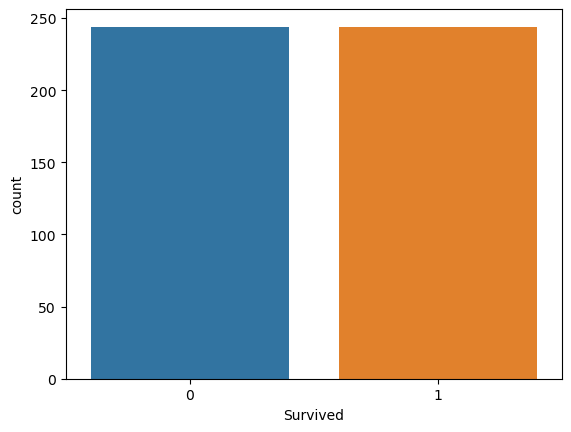

In [25]:
sns.countplot(x=y)